In [1]:
# Knowledge Distillation for 7-Class Image Classification
# Combines directory-based data loading and custom CNN/augmentation from Teacher_model.ipynb

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# -------------------------------
# 0) Reproducibility
# -------------------------------
SEED = 42
tf.keras.utils.set_random_seed(SEED)
np.random.seed(SEED)


In [3]:
# -------------------------------
# 1) Configuration
# -------------------------------
img_size = 128
batch_size = 16
num_classes = 7
input_shape = (img_size, img_size, 3)

train_path = "C:/Users/SATARUPA/OneDrive/Desktop/Tiny ML/Hydrophobicity Classes Photos/train"
val_path = "C:/Users/SATARUPA/OneDrive/Desktop/Tiny ML/Hydrophobicity Classes Photos/validation"

In [4]:
# -------------------------------
# 2) Data Generators
# -------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=SEED,
)
val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=SEED,
)


Found 2800 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [5]:
# -------------------------------
# 3) Custom CNN (as in Teacher_model.ipynb)
# -------------------------------

def custom_cnn(x, size="small"):
    if size == "small":
        # Block 1
        x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 2
        x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 3
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 4
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

    elif size == "medium":
        # Block 1
        x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 2
        x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 3
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 4
        x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 5 (added)
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

    elif size == "large":
        # Block 1
        x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 2
        x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 3
        x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # Block 4
        x = layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)

        # # Block 5
        # x = layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(x)
        # x = layers.BatchNormalization()(x)
        # x = layers.MaxPooling2D((2,2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    return x





In [6]:
def build_student(input_shape, num_classes, size="small"):
    inputs = Input(shape=input_shape)
    x = custom_cnn(inputs, size=size)
    if size == "small":
        x = layers.Dense(32, activation='relu')(x)
        #x = layers.Dropout(0.15)(x)
    elif size == "medium":
        x = layers.Dense(64, activation='relu')(x)
        #x = layers.Dropout(0.20)(x)
    elif size == "large":
        x = layers.Dense(128, activation='relu')(x)
        #x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs, name=f"student_{size}")

# Example: create three different student models
input_shape = (128, 128, 3)
num_classes = 7

student_small = build_student(input_shape, num_classes, size="small")
student_medium = build_student(input_shape, num_classes, size="medium")
student_large = build_student(input_shape, num_classes, size="large")

In [7]:
def get_model_size(model):
    size_bytes = 0
    for layer in model.layers:
        for weight in layer.get_weights():
            size_bytes += weight.nbytes
    return size_bytes

students = {
    "small": student_small,
    "medium": student_medium,
    "large": student_large
}

for size, model in students.items():
    size_bytes = get_model_size(model)
    size_kb = size_bytes / 1024
    size_mb = size_kb / 1024
    print(f"{size.capitalize()} model size: {size_bytes} bytes, {size_kb:.2f} KB, {size_mb:.2f} MB")

Small model size: 2357404 bytes, 2302.15 KB, 2.25 MB
Medium model size: 6513820 bytes, 6361.15 KB, 6.21 MB
Large model size: 12812444 bytes, 12512.15 KB, 12.22 MB


In [8]:
from tensorflow import keras

teacher = keras.models.load_model("model_teacher_kd.keras")


In [9]:
# -------------------------------
# 5) Callbacks (as in your Teacher_model.ipynb)
# -------------------------------
checkpoint = callbacks.ModelCheckpoint(
    "model_teacher_kd.keras", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)
lr_reducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, min_lr=1e-6, verbose=1)
early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True, verbose=1)

In [10]:
# -------------------------------
# 8) KD STUDENT via Distiller (probability-based temperature, categorical)
# -------------------------------
def temp_scale_probs(p, T, eps=1e-8):
    # p: (batch, num_classes) probabilities
    p = tf.clip_by_value(p, eps, 1.0)
    pT = tf.pow(p, 1.0 / T)
    pT = pT / tf.reduce_sum(pT, axis=-1, keepdims=True)
    return pT

class Distiller(Model):
    def __init__(self, student, teacher, T=2.0, alpha=0.7):
        super().__init__(name="distiller_softmax")
        self.student = student
        self.teacher = teacher
        self.teacher.trainable = False
        self.T = float(T)
        self.alpha = float(alpha)
        self.ce = keras.losses.CategoricalCrossentropy()
        self.kld = keras.losses.KLDivergence()
        self.acc = keras.metrics.CategoricalAccuracy(name="acc")
        self.hard_tracker = keras.metrics.Mean(name="hard_loss")
        self.soft_tracker = keras.metrics.Mean(name="soft_loss")
        self.kd_tracker = keras.metrics.Mean(name="kd_loss")

    @property
    def metrics(self):
        return [self.acc, self.hard_tracker, self.soft_tracker, self.kd_tracker]

    def train_step(self, data):
        x, y = data

        t_probs = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            s_probs = self.student(x, training=True)
            hard = self.ce(y, s_probs)
            t_T = temp_scale_probs(t_probs, self.T)
            s_T = temp_scale_probs(s_probs, self.T)
            soft = self.kld(t_T, s_T)
            kd_total = self.alpha * hard + (1.0 - self.alpha) * (self.T ** 2) * soft
        grads = tape.gradient(kd_total, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.student.trainable_variables))
        self.acc.update_state(y, s_probs)
        self.hard_tracker.update_state(hard)
        self.soft_tracker.update_state(soft)
        self.kd_tracker.update_state(kd_total)
        return {"loss": kd_total, "acc": self.acc.result(),
                "hard_loss": self.hard_tracker.result(),
                "soft_loss": self.soft_tracker.result(),
                "kd_loss": self.kd_tracker.result()}

    def test_step(self, data):
        x, y = data
        s_probs = self.student(x, training=False)
        loss = self.ce(y, s_probs)
        self.acc.update_state(y, s_probs)
        return {"loss": loss, "acc": self.acc.result()}


In [11]:
alpha = 0.3
T = 5
results = {}

students = {
    "small": student_small,
    "medium": student_medium,
    "large": student_large
}

for size, student_for_kd in students.items():
    print(f"Training {size} student model with alpha={alpha}, T={T}")
    
    distiller = Distiller(student=student_for_kd, teacher=teacher, T=T, alpha=alpha)
    distiller.compile(optimizer='adam')
    
    hist_kd = distiller.fit(
        train_data,
        validation_data=val_data,
        epochs=30,
        callbacks=[early_stop, lr_reducer],
        verbose=0
    )
    
    results[size] = {
        'T': [T],
        'train_loss': [hist_kd.history['loss'][-1]],
        'train_acc': [hist_kd.history['acc'][-1]],
        'val_loss': [hist_kd.history['val_loss'][-1]],
        'val_acc': [hist_kd.history['val_acc'][-1]],
        'hard_loss': [hist_kd.history['hard_loss'][-1]],
        'soft_loss': [hist_kd.history['soft_loss'][-1]],
        'kd_loss': [hist_kd.history['kd_loss'][-1]]
    }
    
    print(
        f"Model: {size} | "
        f"Last train_loss: {hist_kd.history['loss'][-1]:.4f}, train_acc: {hist_kd.history['acc'][-1]:.4f}, "
        f"val_loss: {hist_kd.history['val_loss'][-1]:.4f}, val_acc: {hist_kd.history['val_acc'][-1]:.4f}, "
        f"hard_loss: {hist_kd.history['hard_loss'][-1]:.4f}, soft_loss: {hist_kd.history['soft_loss'][-1]:.4f}, kd_loss: {hist_kd.history['kd_loss'][-1]:.4f}"
    )


Training small student model with alpha=0.3, T=5
Restoring model weights from the end of the best epoch: 10.
Epoch 17: early stopping
Model: small | Last train_loss: 0.6279, train_acc: 0.9221, val_loss: 0.0041, val_acc: 0.9043, hard_loss: 0.2073, soft_loss: 0.0210, kd_loss: 0.4294
Training medium student model with alpha=0.3, T=5
Restoring model weights from the end of the best epoch: 2.
Epoch 9: early stopping
Model: medium | Last train_loss: 0.7713, train_acc: 0.8793, val_loss: 0.0714, val_acc: 0.8571, hard_loss: 0.3535, soft_loss: 0.0387, kd_loss: 0.7838
Training large student model with alpha=0.3, T=5
Restoring model weights from the end of the best epoch: 9.
Epoch 16: early stopping
Model: large | Last train_loss: 0.5858, train_acc: 0.9071, val_loss: 0.0044, val_acc: 0.9100, hard_loss: 0.2374, soft_loss: 0.0249, kd_loss: 0.5065


In [12]:
alpha = 0.5
T = 6
results = {}

students = {
    "small": student_small,
    "medium": student_medium,
    "large": student_large
}

for size, student_for_kd in students.items():
    print(f"Training {size} student model with alpha={alpha}, T={T}")
    
    distiller = Distiller(student=student_for_kd, teacher=teacher, T=T, alpha=alpha)
    distiller.compile(optimizer='adam')
    
    hist_kd = distiller.fit(
        train_data,
        validation_data=val_data,
        epochs=30,
        callbacks=[early_stop, lr_reducer],
        verbose=0
    )
    
    results[size] = {
        'T': [T],
        'train_loss': [hist_kd.history['loss'][-1]],
        'train_acc': [hist_kd.history['acc'][-1]],
        'val_loss': [hist_kd.history['val_loss'][-1]],
        'val_acc': [hist_kd.history['val_acc'][-1]],
        'hard_loss': [hist_kd.history['hard_loss'][-1]],
        'soft_loss': [hist_kd.history['soft_loss'][-1]],
        'kd_loss': [hist_kd.history['kd_loss'][-1]]
    }
    
    print(
        f"Model: {size} | "
        f"Last train_loss: {hist_kd.history['loss'][-1]:.4f}, train_acc: {hist_kd.history['acc'][-1]:.4f}, "
        f"val_loss: {hist_kd.history['val_loss'][-1]:.4f}, val_acc: {hist_kd.history['val_acc'][-1]:.4f}, "
        f"hard_loss: {hist_kd.history['hard_loss'][-1]:.4f}, soft_loss: {hist_kd.history['soft_loss'][-1]:.4f}, kd_loss: {hist_kd.history['kd_loss'][-1]:.4f}"
    )


Training small student model with alpha=0.5, T=6
Restoring model weights from the end of the best epoch: 11.
Epoch 18: early stopping
Model: small | Last train_loss: 0.3203, train_acc: 0.9407, val_loss: 0.1018, val_acc: 0.8914, hard_loss: 0.1536, soft_loss: 0.0131, kd_loss: 0.3131
Training medium student model with alpha=0.5, T=6
Restoring model weights from the end of the best epoch: 12.
Epoch 19: early stopping
Model: medium | Last train_loss: 0.2626, train_acc: 0.9264, val_loss: 0.0005, val_acc: 0.9114, hard_loss: 0.1915, soft_loss: 0.0156, kd_loss: 0.3771
Training large student model with alpha=0.5, T=6
Restoring model weights from the end of the best epoch: 16.
Epoch 23: early stopping
Model: large | Last train_loss: 0.2803, train_acc: 0.9429, val_loss: 0.0007, val_acc: 0.9000, hard_loss: 0.1577, soft_loss: 0.0127, kd_loss: 0.3074


In [10]:
alpha = 0.7
T = 10
results = {}

students = {
    "small": student_small,
    "medium": student_medium,
    "large": student_large
}

for size, student_for_kd in students.items():
    print(f"Training {size} student model with alpha={alpha}, T={T}")
    
    distiller = Distiller(student=student_for_kd, teacher=teacher, T=T, alpha=alpha)
    distiller.compile(optimizer='adam')
    
    hist_kd = distiller.fit(
        train_data,
        validation_data=val_data,
        epochs=30,
        callbacks=[early_stop, lr_reducer],
        verbose=0
    )
    
    results[size] = {
        'T': [T],
        'train_loss': [hist_kd.history['loss'][-1]],
        'train_acc': [hist_kd.history['acc'][-1]],
        'val_loss': [hist_kd.history['val_loss'][-1]],
        'val_acc': [hist_kd.history['val_acc'][-1]],
        'hard_loss': [hist_kd.history['hard_loss'][-1]],
        'soft_loss': [hist_kd.history['soft_loss'][-1]],
        'kd_loss': [hist_kd.history['kd_loss'][-1]]
    }
    
    print(
        f"Model: {size} | "
        f"Last train_loss: {hist_kd.history['loss'][-1]:.4f}, train_acc: {hist_kd.history['acc'][-1]:.4f}, "
        f"val_loss: {hist_kd.history['val_loss'][-1]:.4f}, val_acc: {hist_kd.history['val_acc'][-1]:.4f}, "
        f"hard_loss: {hist_kd.history['hard_loss'][-1]:.4f}, soft_loss: {hist_kd.history['soft_loss'][-1]:.4f}, kd_loss: {hist_kd.history['kd_loss'][-1]:.4f}"
    )


Training small student model with alpha=0.7, T=10
Restoring model weights from the end of the best epoch: 1.
Epoch 8: early stopping
Model: small | Last train_loss: 0.2841, train_acc: 0.8818, val_loss: 0.3112, val_acc: 0.8457, hard_loss: 0.3090, soft_loss: 0.0114, kd_loss: 0.5574
Training medium student model with alpha=0.7, T=10
Restoring model weights from the end of the best epoch: 7.
Epoch 14: early stopping
Model: medium | Last train_loss: 0.2447, train_acc: 0.8982, val_loss: 0.5472, val_acc: 0.6057, hard_loss: 0.2706, soft_loss: 0.0106, kd_loss: 0.5084
Training large student model with alpha=0.7, T=10
Model: large | Last train_loss: 0.3086, train_acc: 0.9479, val_loss: 0.1349, val_acc: 0.8657, hard_loss: 0.1333, soft_loss: 0.0054, kd_loss: 0.2556


In [11]:
alpha = 1.0
T = 6
results = {}

students = {
    "small": student_small,
    "medium": student_medium,
    "large": student_large
}

for size, student_for_kd in students.items():
    print(f"Training {size} student model with alpha={alpha}, T={T}")
    
    distiller = Distiller(student=student_for_kd, teacher=teacher, T=T, alpha=alpha)
    distiller.compile(optimizer='adam')
    
    hist_kd = distiller.fit(
        train_data,
        validation_data=val_data,
        epochs=30,
        callbacks=[early_stop, lr_reducer],
        verbose=0
    )
    
    results[size] = {
        'T': [T],
        'train_loss': [hist_kd.history['loss'][-1]],
        'train_acc': [hist_kd.history['acc'][-1]],
        'val_loss': [hist_kd.history['val_loss'][-1]],
        'val_acc': [hist_kd.history['val_acc'][-1]],
        'hard_loss': [hist_kd.history['hard_loss'][-1]],
        'soft_loss': [hist_kd.history['soft_loss'][-1]],
        'kd_loss': [hist_kd.history['kd_loss'][-1]]
    }
    
    print(
        f"Model: {size} | "
        f"Last train_loss: {hist_kd.history['loss'][-1]:.4f}, train_acc: {hist_kd.history['acc'][-1]:.4f}, "
        f"val_loss: {hist_kd.history['val_loss'][-1]:.4f}, val_acc: {hist_kd.history['val_acc'][-1]:.4f}, "
        f"hard_loss: {hist_kd.history['hard_loss'][-1]:.4f}, soft_loss: {hist_kd.history['soft_loss'][-1]:.4f}, kd_loss: {hist_kd.history['kd_loss'][-1]:.4f}"
    )


Training small student model with alpha=1.0, T=6
Restoring model weights from the end of the best epoch: 2.
Epoch 9: early stopping
Model: small | Last train_loss: 0.2931, train_acc: 0.8654, val_loss: 21.4041, val_acc: 0.4429, hard_loss: 0.3632, soft_loss: 0.0698, kd_loss: 0.3632
Training medium student model with alpha=1.0, T=6
Restoring model weights from the end of the best epoch: 7.
Epoch 14: early stopping
Model: medium | Last train_loss: 0.3593, train_acc: 0.8754, val_loss: 0.9734, val_acc: 0.8557, hard_loss: 0.3423, soft_loss: 0.0679, kd_loss: 0.3423
Training large student model with alpha=1.0, T=6
Restoring model weights from the end of the best epoch: 22.
Epoch 29: early stopping
Model: large | Last train_loss: 0.4703, train_acc: 0.9375, val_loss: 1.1614, val_acc: 0.8629, hard_loss: 0.1732, soft_loss: 0.0620, kd_loss: 0.1732


In [19]:
# Save student models similarly
student_small.save("C:/Users/SATARUPA/OneDrive/Desktop/Tiny ML/student_small_model.keras")
student_medium.save("C:/Users/SATARUPA/OneDrive/Desktop/Tiny ML/student_medium_model.keras")
student_large.save("C:/Users/SATARUPA/OneDrive/Desktop/Tiny ML/student_large_model.keras")



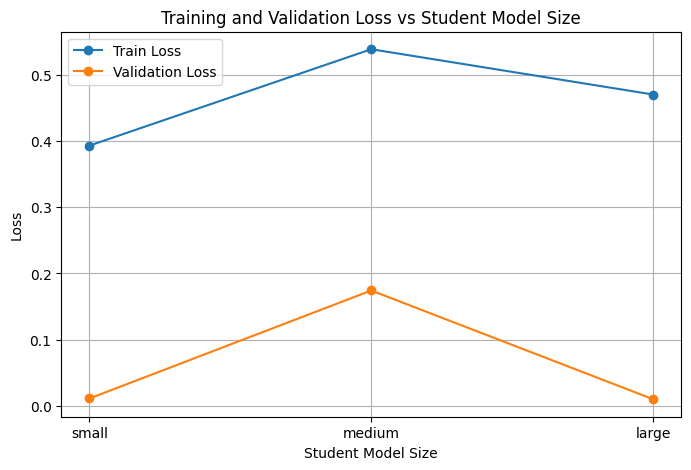

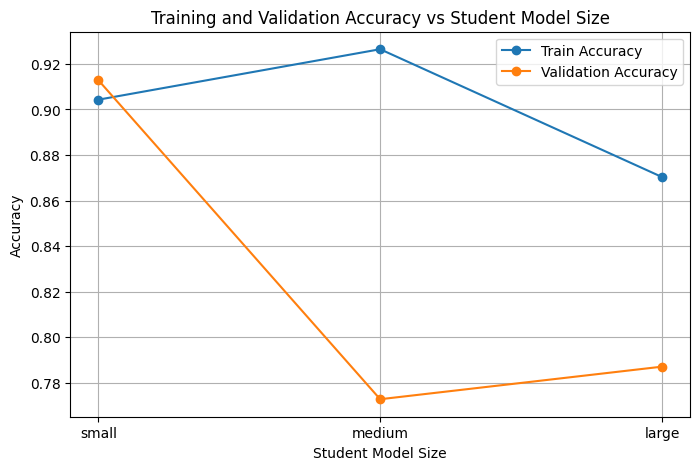

In [12]:
import matplotlib.pyplot as plt
import numpy as np

sizes = ['small', 'medium', 'large']

train_loss = [results[s]['train_loss'][0] for s in sizes]
val_loss = [results[s]['val_loss'][0] for s in sizes]

train_acc = [results[s]['train_acc'][0] for s in sizes]
val_acc = [results[s]['val_acc'][0] for s in sizes]

x = np.arange(len(sizes))

# Plot 1: Losses
plt.figure(figsize=(8,5))
plt.plot(x, train_loss, marker='o', label='Train Loss')
plt.plot(x, val_loss, marker='o', label='Validation Loss')
plt.xticks(x, sizes)
plt.xlabel('Student Model Size')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Student Model Size')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Accuracies
plt.figure(figsize=(8,5))
plt.plot(x, train_acc, marker='o', label='Train Accuracy')
plt.plot(x, val_acc, marker='o', label='Validation Accuracy')
plt.xticks(x, sizes)
plt.xlabel('Student Model Size')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Student Model Size')
plt.legend()
plt.grid(True)
plt.show()
